## Exploratory Data Analysis - Retail

### Author : Neeyati Satgounda.


### For this task we are performing exploratory data analysis on the supersamplestore dataset.

## Step 1 : Importing all required libraries and data file.

In [1]:
#imporing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset

In [2]:
# importing the data 
store = pd.read_csv(r'C:\Users\Padmakumar\Downloads\SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
store.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
store.shape

(9994, 13)

In [5]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Cheking for duplicate entries in dataset.
store.duplicated().sum()

17

In [8]:
# Dropping the duplicates
o=store.drop_duplicates(inplace=True)

In [9]:
store.shape

(9977, 13)

In [10]:
# Counting of unique entries in dataset
for col in store.columns:
    if store[col].dtype =='object':
        print("Number of unique entries in ",col + "are" , store[col].nunique())

Number of unique entries in  Ship Modeare 4
Number of unique entries in  Segmentare 3
Number of unique entries in  Countryare 1
Number of unique entries in  Cityare 531
Number of unique entries in  Stateare 49
Number of unique entries in  Regionare 4
Number of unique entries in  Categoryare 3
Number of unique entries in  Sub-Categoryare 17


In [11]:
 store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [12]:
# Here we are adding two more coloumns with name Cost and progit%
store['Cost'] = store['Sales']-store['Profit']
store['Profit%'] = (store['Profit']/store['Cost'])*100

In [13]:
store.head(10)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,34.6906,40.845070
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,5.3144,36.986301
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,816.4368,11.111111
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,12.7215,45.454545
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,80.4300,42.857143


Text(0.5, 1.0, 'correltion between the all variables')

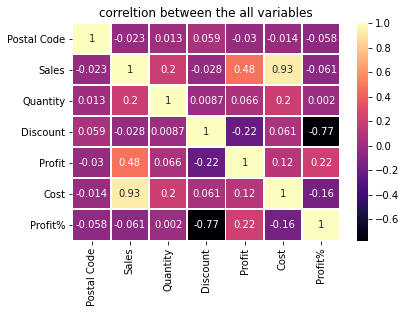

In [14]:
# correlation matrix and heatmap
sns.heatmap(store.corr() , annot=True , linecolor="white" , linewidth="1",  cmap="magma")
plt.title ('correltion between the all variables')

##### Sales and Profit are Modaterely Correlated.
#####  Quantity and Profit are Modaterely Correlated.
##### Discount and Profit are Negatively Correlated.

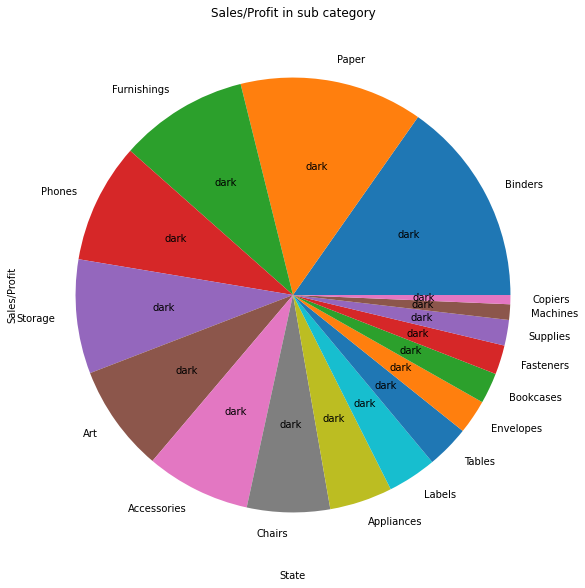

In [15]:
# sales and profit(simultaneously) in each sub-category
plt.figure(figsize=(20,10))
subcategory_sale_profit = store.groupby('Sub-Category')[['Sales', 'Profit']].sum()
subcategory_sale_profit.sort_values('Sales', ascending = False, inplace = True)
store['Sub-Category'].value_counts().plot.pie(autopct='dark')
plt.title('Sales/Profit in sub category')
plt.xlabel('State')
plt.ylabel('Sales/Profit')
plt.show()

#### Phones and Chairs have highest sales wherase labels and fasteners have least sales in sub-category. Tables sub-category has encountered a loss compared to other sub-category

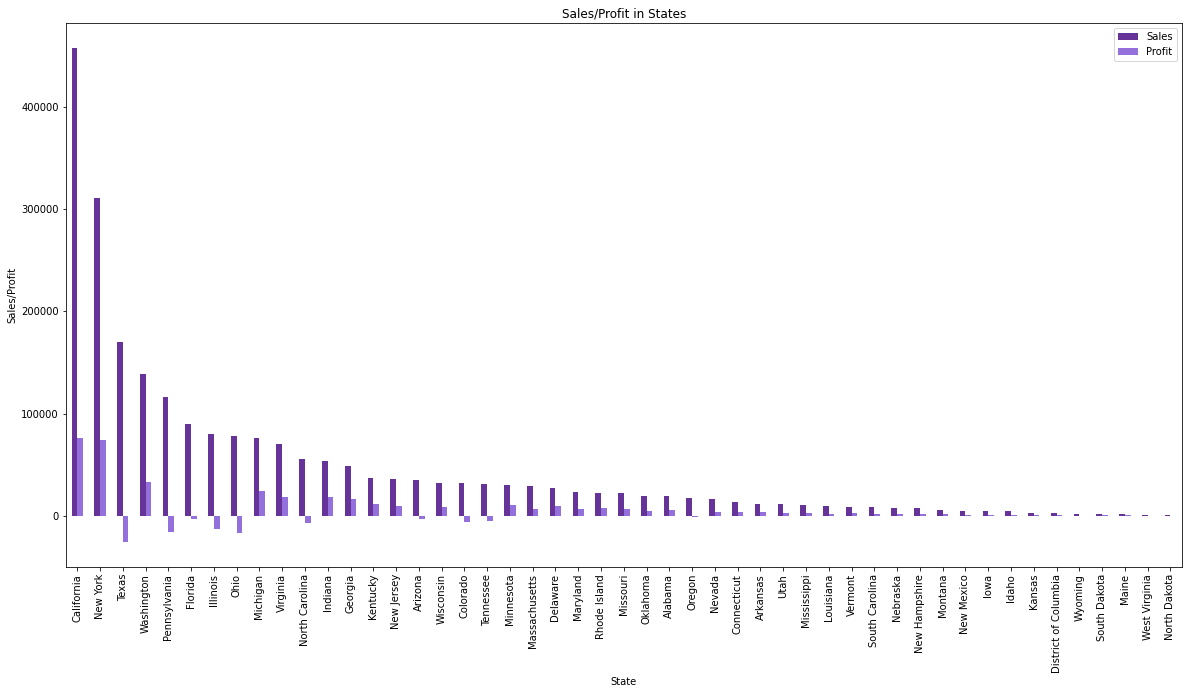

In [16]:
# state-wise sales and profit(simultaneously).
state_sale_profit = store.groupby('State')[['Sales', 'Profit']].sum()
state_sale_profit.sort_values('Sales', ascending = False, inplace = True)
state_sale_profit.plot(kind = "bar" , color = ["rebeccapurple" , "mediumpurple"] , figsize=(20,10))
plt.title('Sales/Profit in States')
plt.xlabel('State')
plt.ylabel('Sales/Profit')
plt.show()


### California and New york has more profit at the same time Ohio, Texax faced loss.

C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


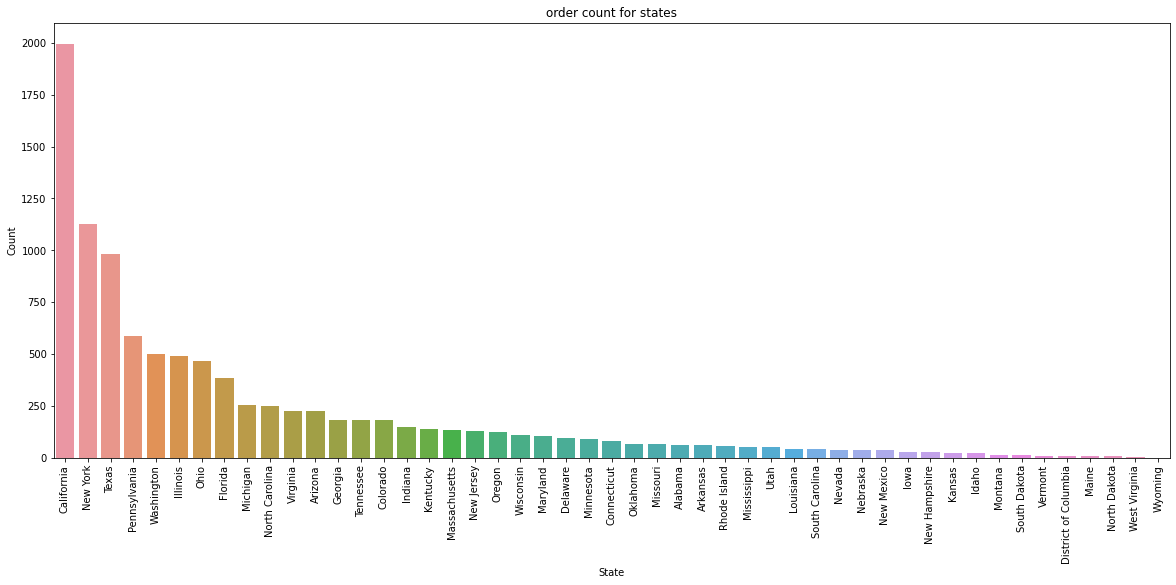

In [17]:
# number of orders in each state.
plt.figure(figsize = (20,8))
sns.countplot(store['State'], order = store['State'].value_counts().index )
plt.title('order count for states')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

### California and New York has more orders as compare to all other states.California has double order rate than Texas.

C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Profit')

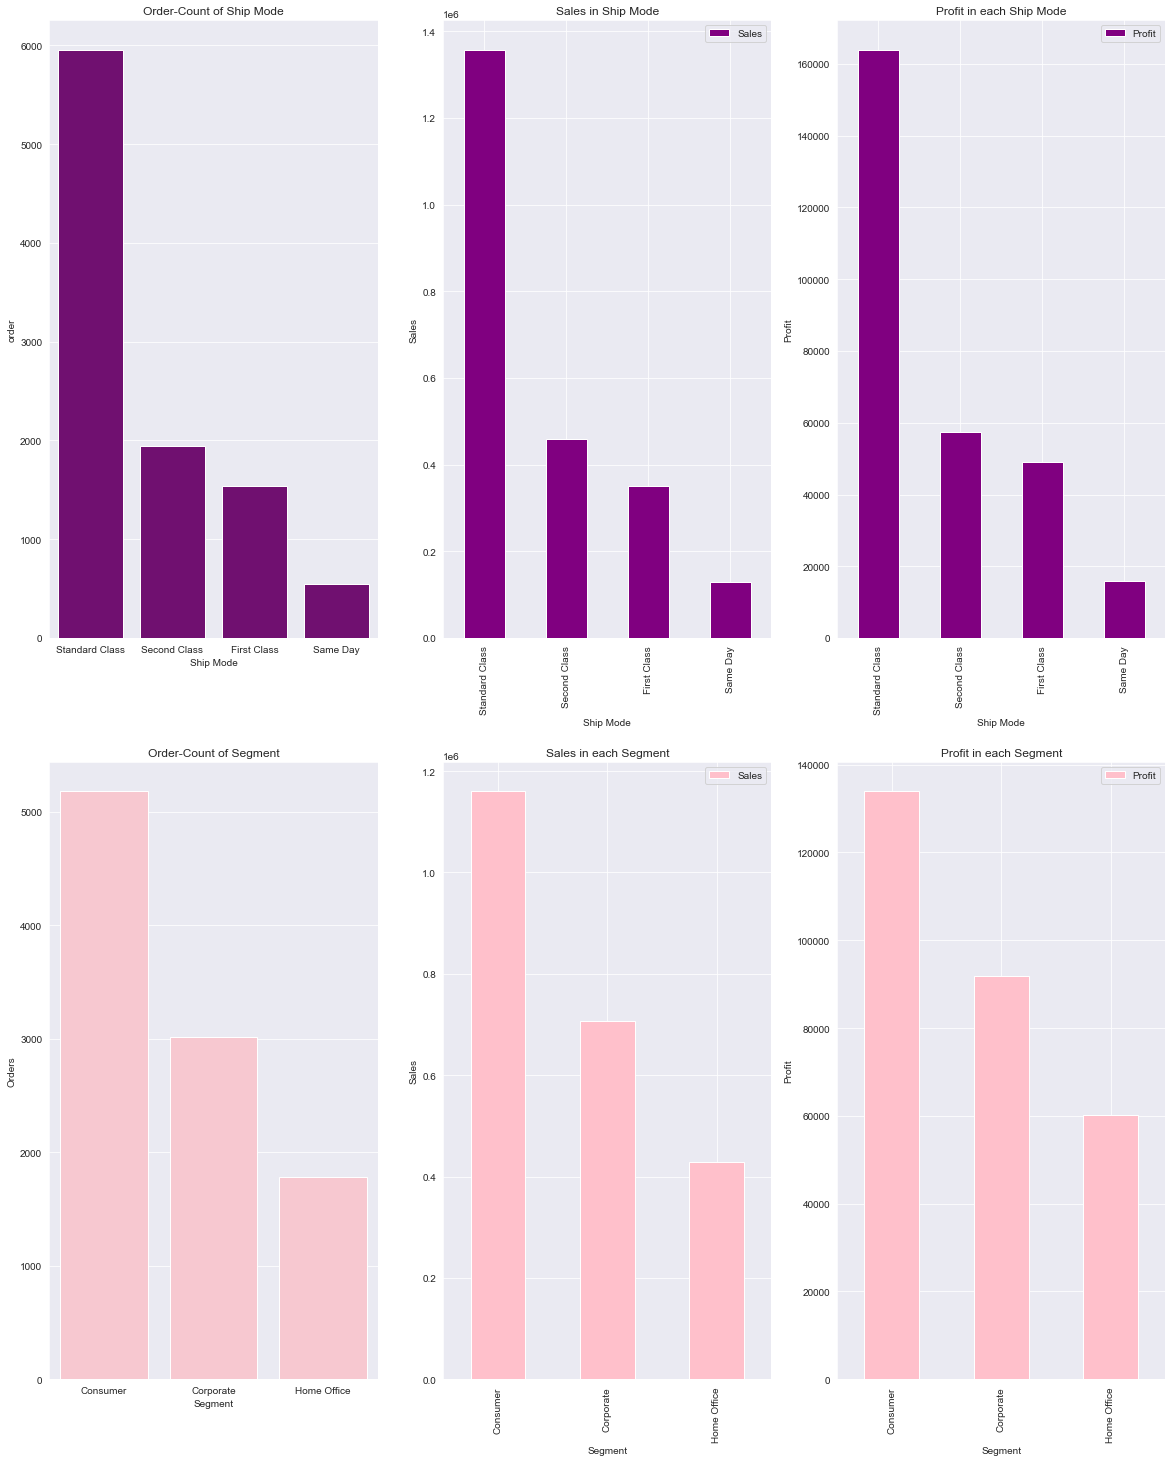

In [18]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 3, figsize=(20, 25))
# order-count/sales/profit in each ship mode.
sns.countplot(store['Ship Mode'], color ='purple', order=store['Ship Mode'].value_counts().index, ax=ax[0][0])
ax[0][0].title.set_text("Order-Count of Ship Mode")
ax[0][0].set_xlabel("Ship Mode")
ax[0][0].set_ylabel("order")

ship_sale_profit = store.groupby('Ship Mode')[['Sales', 'Profit']].sum()
ship_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True)
ship_sale_profit.plot(y='Sales', kind ='bar', color ="purple", ax=ax[0][1])
ax[0][1].title.set_text("Sales in Ship Mode")
ax[0][1].set_xlabel("Ship Mode")
ax[0][1].set_ylabel("Sales")


ship_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True)
ship_sale_profit.plot(y='Profit',kind="bar",color='purple', ax=ax[0][2])
ax[0][2].title.set_text('Profit in each Ship Mode')
ax[0][2].set_xlabel('Ship Mode')
ax[0][2].set_ylabel('Profit')
   
    
    

# Order-count/sales/profit in each Segment.
sns.countplot(store['Segment'], color ='pink', order=store['Segment'].value_counts().index, ax=ax[1][0])
ax[1][0].title.set_text("Order-Count of Segment")
ax[1][0].set_xlabel("Segment")
ax[1][0].set_ylabel("Orders")

seg_sale_profit = store.groupby('Segment')[['Sales', 'Profit']].sum()
seg_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True)
seg_sale_profit.plot(y='Sales', kind ='bar', color ="pink", ax=ax[1][1])
ax[1][1].title.set_text("Sales in each Segment")
ax[1][1].set_xlabel("Segment")
ax[1][1].set_ylabel("Sales")


seg_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True)
seg_sale_profit.plot(y='Profit',kind="bar",color='pink', ax=ax[1][2])
ax[1][2].title.set_text('Profit in each Segment')
ax[1][2].set_xlabel('Segment')
ax[1][2].set_ylabel('Profit')


### from the above graphs , Standard class Shipmode  has more order-count , Sales as well as Profit.Similarly, Consumer Segment has More Order count, Sales and Profit.

C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Profit')

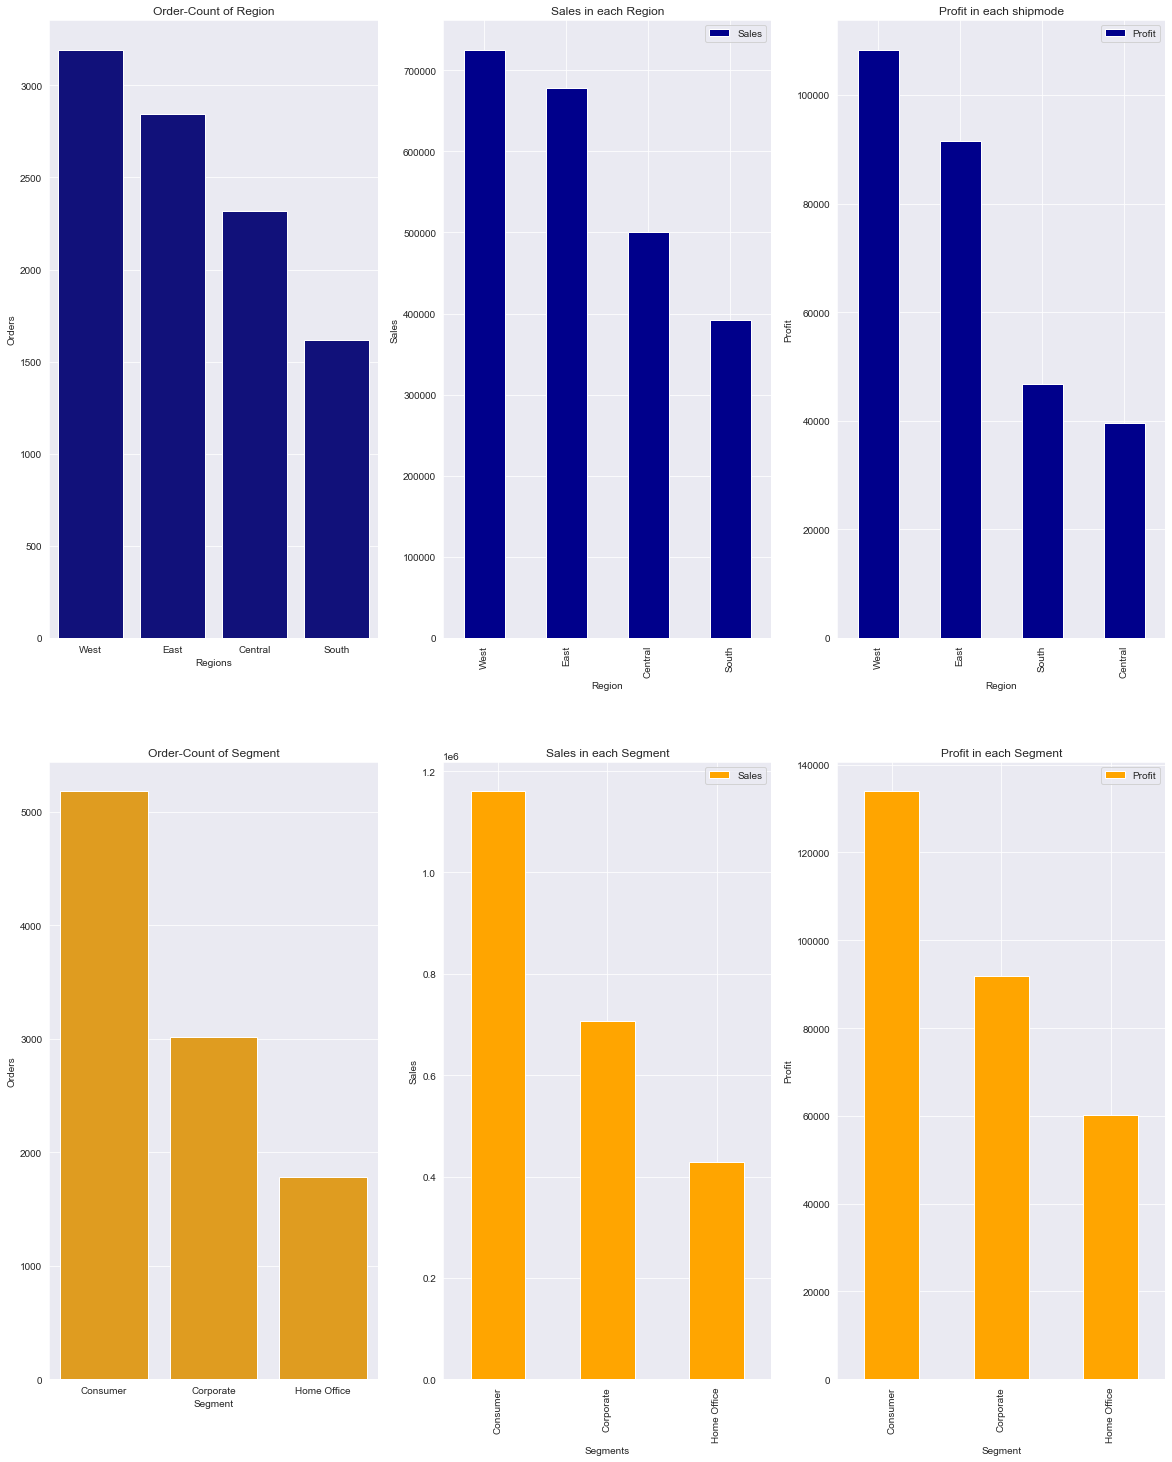

In [19]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 3, figsize=(20, 25)) # order-count/sales/profit in each Region.
sns.countplot(store['Region'], color ='darkblue', order=store['Region'].value_counts().index, ax=ax[0][0])
ax[0][0].title.set_text("Order-Count of Region")
ax[0][0].set_xlabel("Regions")
ax[0][0].set_ylabel("Orders")

reg_sale_profit = store.groupby('Region')[['Sales', 'Profit']].sum()
reg_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True)
reg_sale_profit.plot(y='Sales', kind ='bar', color ="darkblue", ax=ax[0][1])
ax[0][1].title.set_text("Sales in each Region")
ax[0][1].set_xlabel("Region")
ax[0][1].set_ylabel("Sales")


reg_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True)
reg_sale_profit.plot(y='Profit',kind="bar",color='darkblue', ax=ax[0][2])
ax[0][2].title.set_text('Profit in each shipmode')
ax[0][2].set_xlabel('Region')
ax[0][2].set_ylabel('Profit')
   
    
    

# Order-count/sales/profit in each segment.
sns.countplot(store['Segment'], color ='orange', order=store['Segment'].value_counts().index, ax=ax[1][0])
ax[1][0].title.set_text("Order-Count of Segment")
ax[1][0].set_xlabel("Segment")
ax[1][0].set_ylabel("Orders")

seg_sale_profit = store.groupby('Segment')[['Sales', 'Profit']].sum()
seg_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True)
seg_sale_profit.plot(y='Sales', kind ='bar', color ="orange", ax=ax[1][1])
ax[1][1].title.set_text("Sales in each Segment")
ax[1][1].set_xlabel("Segments")
ax[1][1].set_ylabel("Sales")


seg_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True)
seg_sale_profit.plot(y='Profit',kind="bar",color='orange', ax=ax[1][2])
ax[1][2].title.set_text('Profit in each Segment')
ax[1][2].set_xlabel('Segment')
ax[1][2].set_ylabel('Profit')


### from the above graphs , West Region has more order-count , Sales as well as Profit. Similarly, Consumer Segment has More Order count, Sales and Profit.

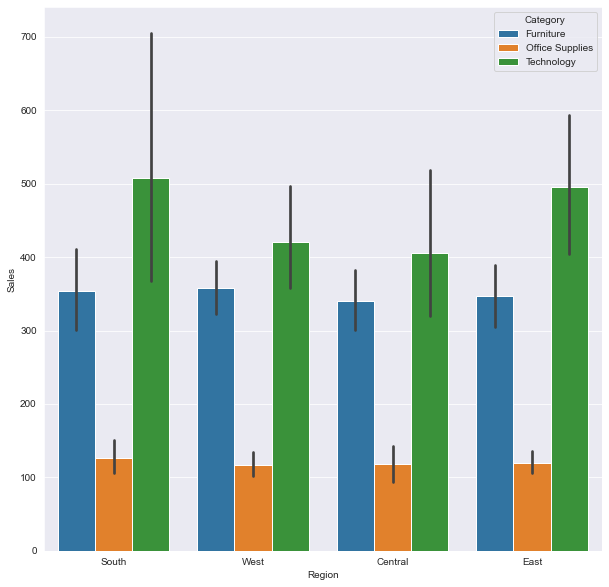

In [20]:
# sales of category in each region
plt.figure(figsize=[10,10])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=store, ) #hue parameter determines which column in the dataframe
                                                                  #should be used for colour encoding. ... Adding `hue="smoker"
                                                                  #  tells seaborn you want to colour the data points for
                                                                  # smoker and non-smoker differently

### In each Region sales of Office Suppliers is low.

C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


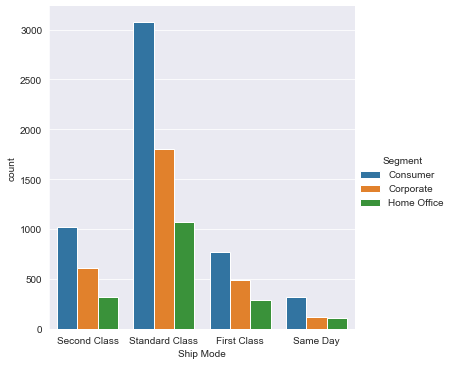

In [21]:
#segment count in each shipmode
sns.catplot("Ship Mode", hue="Segment", data=store, kind="count" )

### Order via home office  shipmode is less as compared to other in all category. 

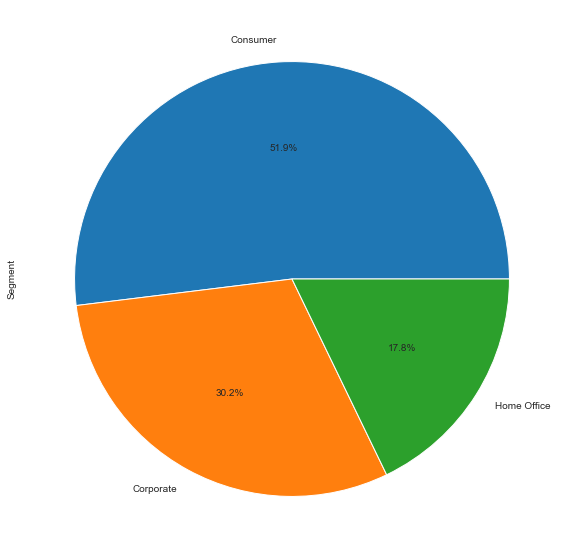

In [22]:
#segment wise sales in each region.
plt.figure(figsize=[10,10])
store['Segment'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

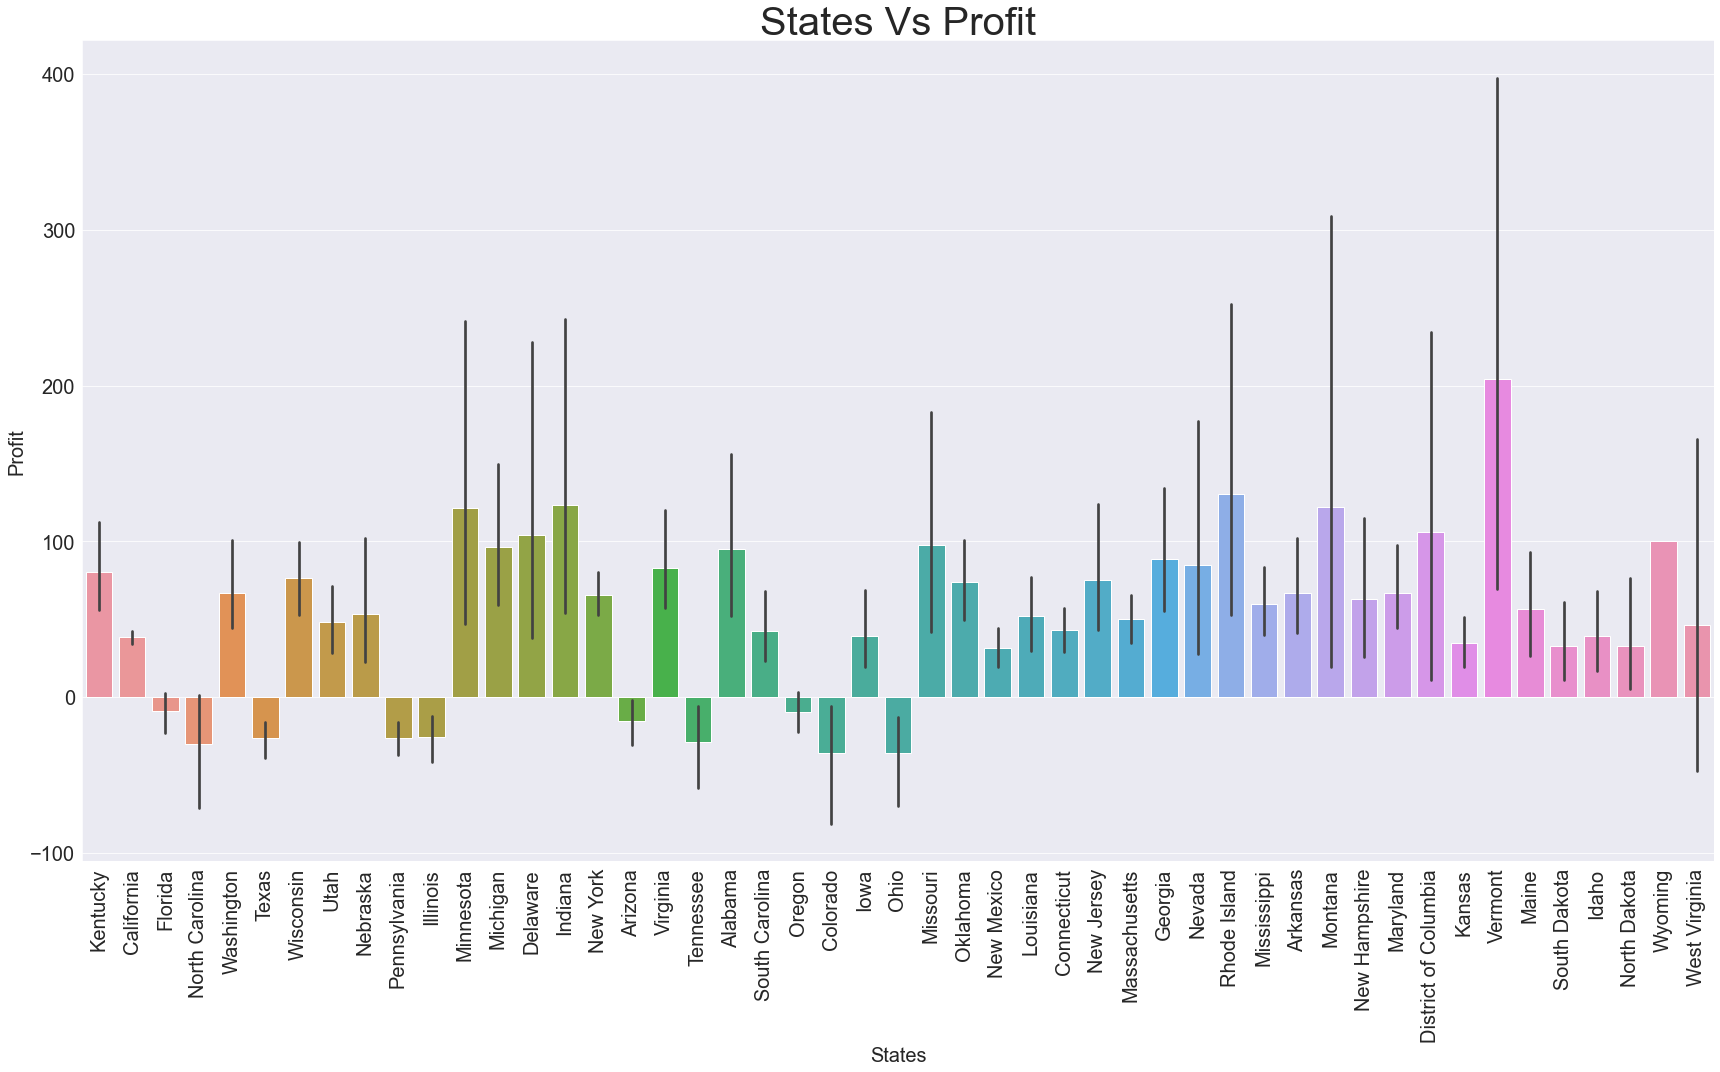

In [23]:
# state wise profit
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=store)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.title("States Vs Profit",fontsize=40)
plt.xlabel("States", fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()


## Some States are generating more profits whereas some encountered a loss.

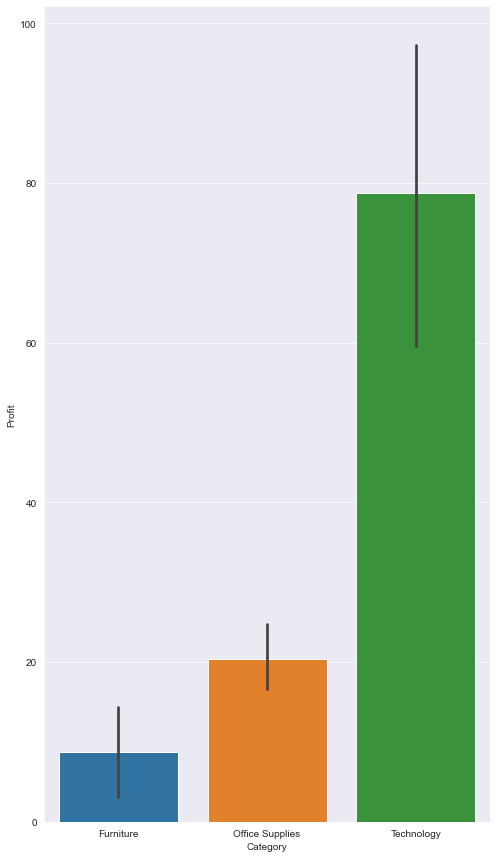

In [24]:
# Category wise profit in whole country
plt.figure(figsize=(8,15))
ax = sns.barplot(x="Category", y="Profit", data=store)

### Technology category has more profit with comparative to Furniture and Office Supplies.

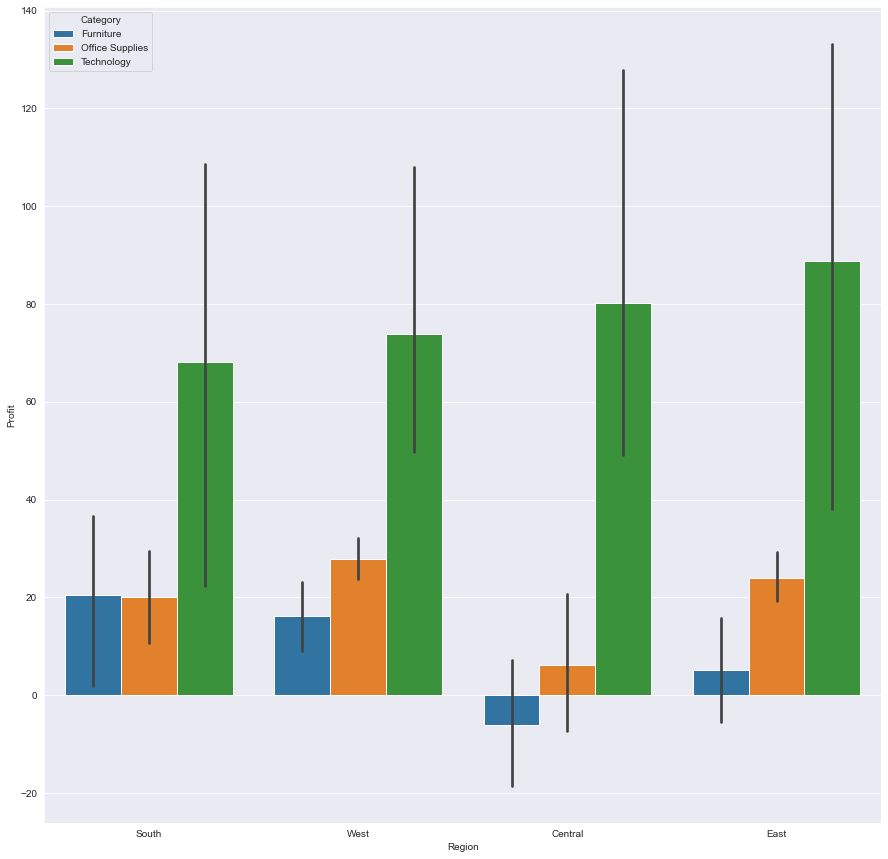

In [25]:
# category wise profit in each region
plt.figure(figsize=(15,15))
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=store)

 ## Conclusion:

#### In Shipping Models , the most profitable and the most preferred shipping mode is the Standard Class.

#### The Consumer Segment is the most profitable and has the most number of buyers.

#### The Western region has the most sales and profit.

#### Office Supplies has the the highest frequency of purchases. Technology has the most sales and is the most profitable,Furniture has the least profit although it has the second-highest sales. 

#### Within Furniture, Tables in all segments undergoes heavy losses, and Tables also accounts for the highets loss product.

#### Out of the top 10 states with the highest sales, 5 undergo an overall loss.

#### Texas , which has the third-highest sales ,witness the highest loss.

#### The profit for the both California and New York is more or less the same, But California has the highest sales, and New York the second highest.Therefore , we can say that for the same amount of sales , New York is more profitable.

#### In technology , although Machine have a pretty decent sales , the resultant profit is low.However, copiers and accessories compensate for that.